In [101]:
import numpy as np
import matplotlib.pyplot as plt

### Activation functions
And their derivatives

In [102]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def tanh(Z):
    return np.tanh(Z)

def d_sigmoid(Z):
    sig = sigmoid(Z)
    return sig * (1 - sig)

def d_tanh(Z):
    return 1/np.cosh(Z)**2

def d_relu(Z):
    return (Z >= 0) * 1.0

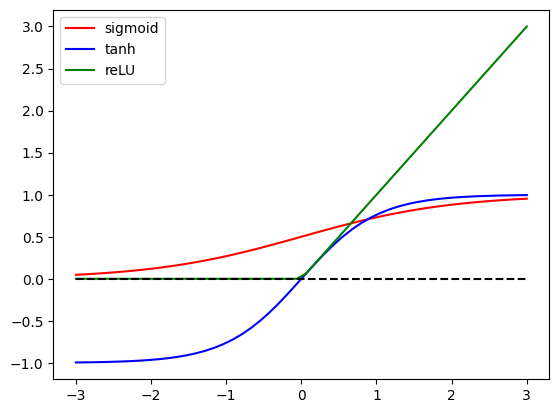

In [103]:
plt.plot(np.linspace(-3,3),sigmoid(np.linspace(-3,3)),"r-",label="sigmoid")
plt.plot(np.linspace(-3,3),tanh(np.linspace(-3,3)),"b-",label="tanh")
plt.plot(np.linspace(-3,3),relu(np.linspace(-3,3)),"g-",label="reLU")
plt.plot(np.linspace(-3,3),np.linspace(-3,3)*0,"k--")
plt.legend();

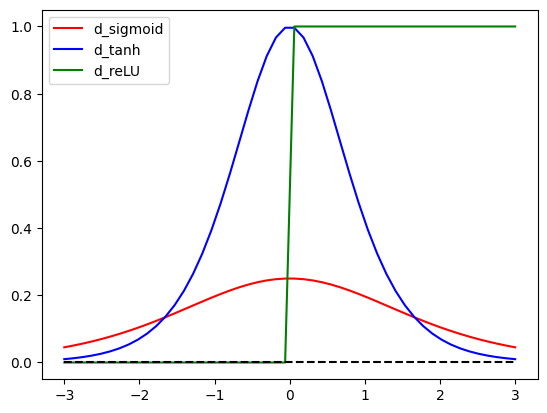

In [104]:
plt.plot(np.linspace(-3,3),d_sigmoid(np.linspace(-3,3)),"r-",label="d_sigmoid")
plt.plot(np.linspace(-3,3),d_tanh(np.linspace(-3,3)),"b-",label="d_tanh")
plt.plot(np.linspace(-3,3),d_relu(np.linspace(-3,3)),"g-",label="d_reLU")
plt.plot(np.linspace(-3,3),np.linspace(-3,3)*0,"k--")
plt.legend();

### First example: The XOR function
|XOR|0|1|
|---|---|---|
|0|0|1|
|1|1|0|

In [105]:
X = np.random.randint(2,size=(100,2))
X[:5]

array([[1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [106]:
y = np.logical_xor(X[:,0],X[:,1]) * 1
y

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [107]:
# weight between input (size=2), and hidden (size=2)
W0 = np.random.normal(size=(2,2))
# weight between hidden (size=2), and output (size=1)
W1 = np.random.normal(size=(2,1))

In [108]:
#feed forward
x = X[0]
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
print(x,y[0],A2)

[1 1] 0 [0.]


(100,) (100, 1)
[[-0.00535433  0.17524232]
 [ 1.84024095 -1.82223315]] [[-0.37473033]
 [ 1.76564043]]


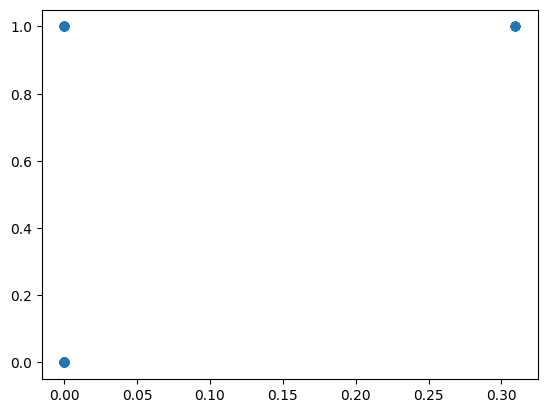

In [109]:
#feed forward multiple data
W0 = np.random.normal(size=(2,2))
W1 = np.random.normal(size=(2,1))
x = X
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
print(y.shape,A2.shape)
print(W0,W1)
plt.scatter(A2,y)

[[ 1. -1.]
 [-1.  1.]] [1. 1.]


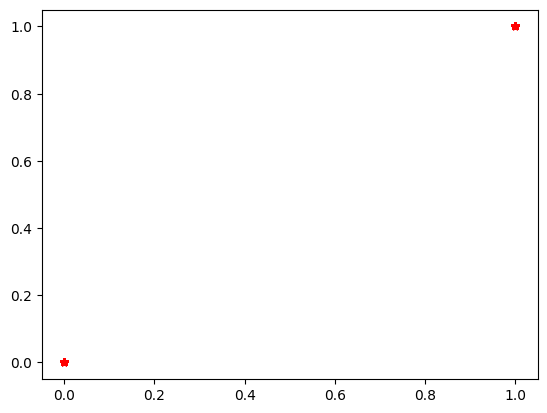

In [110]:
W0 = np.array([[1,-1],[-1,1]],dtype=float)
W1 = np.array([1,1],dtype=float)
x = X
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
print(W0,W1)
plt.plot(A2,y,"r*")

[[ 0.10349771 -0.22489574]
 [-0.8772496   0.67209803]] [0.80802719 0.96489823]


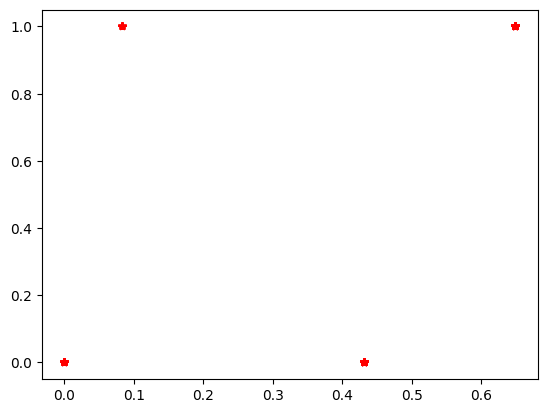

In [111]:
W0 = np.array([[1,-1],[-1,1]],dtype=float)*np.random.random((2,2))
W1 = np.array([1,1],dtype=float)*np.random.random((2))
x = X
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
print(W0,W1)
plt.plot(A2,y,"r*")

In [112]:
#feed forward
x = X[0]
A0 = x
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
# Backpropagation
alpha = 0.1
m = 1
deltaA = A2 - y[0]
print(deltaA,A2,y[0])

0.4315046979159101 0.4315046979159101 0


In [113]:
#feed forward
x = X[0]
A0 = x
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
# Backpropagation
alpha = 0.1
m = 1
deltaA = A2 - y[0]
deltaZ = deltaA * d_relu(Z2)
print(deltaA,deltaZ,Z2)

0.4315046979159101 0.4315046979159101 0.4315046979159101


In [114]:
#feed forward
x = X[0]
A0 = x
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
# Backpropagation
alpha = 0.1
m = 1
print(W1)
deltaA = A2 - y[0]
deltaZ = deltaA * d_relu(Z2)
W1[0] -= alpha * A1[0] * deltaZ
W1[1] -= alpha * A1[1] * deltaZ
print(W1,A1,deltaZ)

[0.80802719 0.96489823]
[0.80802719 0.94560124] [0.         0.44720229] 0.4315046979159101


In [115]:
#feed forward
i = np.random.randint(len(y))
x = X[i]
A0 = x
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
# Backpropagation
alpha = 0.1
m = 1
print(W0,W1)
deltaA = A2 - y[i]
deltaZ = deltaA * d_relu(Z2)
W1[0] -= alpha * A1[0] * deltaZ
W1[1] -= alpha * A1[1] * deltaZ
deltaA = np.dot(deltaZ,W1.T)
deltaZ = deltaA * d_relu(Z1)
W0[0,0] -= alpha * x[0] * deltaZ[0]
W0[0,1] -= alpha * x[0] * deltaZ[1]
W0[1,0] -= alpha * x[1] * deltaZ[0]
W0[1,1] -= alpha * x[1] * deltaZ[1]
print(W0,W1)

[[ 0.10349771 -0.22489574]
 [-0.8772496   0.67209803]] [0.80802719 0.94560124]
[[ 0.10349771 -0.22489574]
 [-0.8772496   0.67209803]] [0.80802719 0.94560124]


In [116]:
W0 = np.array([[1,-1],[-1,1]],dtype=float)*np.random.random((2,2))
W1 = np.array([1,1],dtype=float)*np.random.random((2))

In [117]:
for _ in range(1000):
    #feed forward
    i = np.random.randint(len(y))
    x = X[i]
    A0 = x
    Z1 = np.dot(x,W0)
    A1 = relu(Z1)
    Z2 = np.dot(A1,W1)
    A2 = relu(Z2)
    # Backpropagation
    alpha = 0.1
    m = 1
    deltaA = A2 - y[i]
    deltaZ = deltaA * d_relu(Z2)
    W1[0] -= alpha * A1[0] * deltaZ
    W1[1] -= alpha * A1[1] * deltaZ
    deltaA = np.dot(deltaZ,W1.T)
    deltaZ = deltaA * d_relu(Z1)
    W0[0,0] -= alpha * x[0] * deltaZ[0]
    W0[0,1] -= alpha * x[0] * deltaZ[1]
    W0[1,0] -= alpha * x[1] * deltaZ[0]
    W0[1,1] -= alpha * x[1] * deltaZ[1]
print(W0,W1)

[[ 0.97872384 -1.00578802]
 [-0.97872378  1.00488851]] [1.0217354  0.99513527]


[[ 0.97872384 -1.00578802]
 [-0.97872378  1.00488851]] [1.0217354  0.99513527]


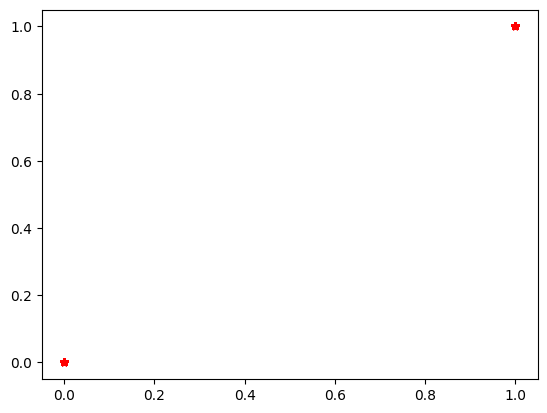

In [118]:
x = X
Z1 = np.dot(x,W0)
A1 = relu(Z1)
Z2 = np.dot(A1,W1)
A2 = relu(Z2)
print(W0,W1)
plt.plot(A2,y,"r*")

### Generate test data
 * Unit circle 500 points
 * Input layer: two coordinates (500,2) array
 * Output layer: one category (500,1) array

(Note, that we use a two dimensional array for target to be more generic and be able to use matrix functions)

In [119]:
N = 1000
np.random.seed(12345)
train_x = np.random.random((N,2)) * 2.0 - 1.0
train_y = np.array([((train_x[:,0]**2+train_x[:,1]**2)<1) + 0]).T
print(np.shape(train_x),np.shape(train_y))

(1000, 2) (1000, 1)


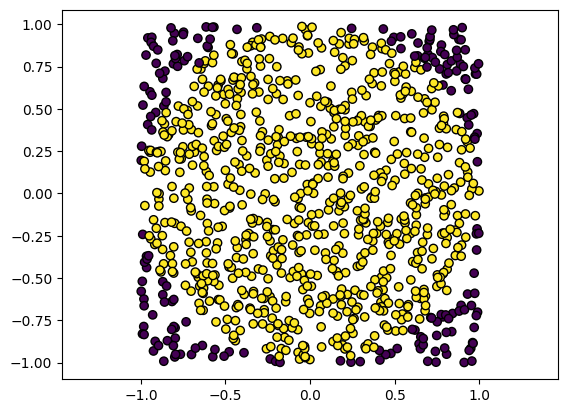

In [120]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=train_y[:,0],edgecolors='black');

### Feed forward
#### Single layer
$$
\begin{align}
\mathbf{Z}^{(l)} =& \mathbf{W}^{(l)} \cdot \mathbf{A}^{(l-1)}\\
\mathbf{A}^{(l)} =& g^{(l)}(\mathbf{Z}^{(l)}),
\end{align}
$$
where $\mathbf{A}^{(l)}$ is the output, $\mathbf{W}^{(l)}$ is the weight matrix, $g^{(l)}$ is the activation function of layer $l$.

The input of the function `feed_forward(A, W, g)` is, the output of the previous layer `A`, the weight matrix of the layer `W`, and the activation function `g`.

### Weight function
 * Three layer network
 * ML = 10 hidden nodes

In [121]:
ML = 10
W = [ np.random.random((2,ML))*2-1,  np.random.random((ML,1))*2-1 ]

### TASK: Feed Forward
Implement:
`feed_forward(X, W, g):`

For each $l$
$$
\begin{align}
\mathbf{Z}^{(l)} =& \mathbf{W}^{(l)} \cdot \mathbf{A}^{(l-1)}\\
\mathbf{A}^{(l)} =& g^{(l)}(\mathbf{Z}^{(l)}),
\end{align}
$$

In [122]:
def feed_forward(X, W, g):
    for l in range(len(W)):
        Z = X @ W[l]
        X = g(Z)
    return X 

In [123]:
feed_forward(train_x,W,sigmoid);

### Test it
Now it should give arbitrary pattern

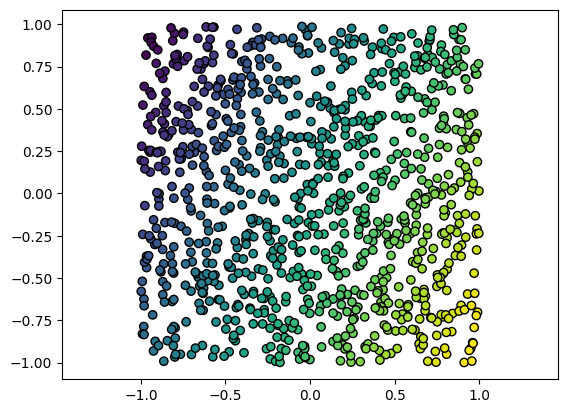

In [124]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=feed_forward(train_x,W,sigmoid)[:,0],edgecolors='black');

### Feedforward with memory
We will need the values of `A` and `Z` so let as save it.

`A` is the result of the weight product, `Z` is the value after the application of the activaton function. Layer 0 is the input layer, `Z[0]=X`, and `A[0]=undefined`. 

In [125]:
memA = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
memZ = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]

In [126]:
def feed_forward_with_mem(X, W, g, memA, memZ):
    memA[0] = X
    for l in range(len(W)):
        memZ[l+1] = memA[l] @ W[l]
        memA[l+1] = g(memZ[l+1])
    return memA[len(W)]

In [127]:
print(memA[1].shape[1])

10


### TASK: Backpropagation
Last error is in $dA^{l+1}$. Originally it is 
$$
dA^{l+1} = Y - A^{l+1}
$$
Algorithm:
$$
\begin{align}
dZ^{l+1}&=dA^{l+1}\ast g'(Z^{l+1})\cr
dA^l&=\frac{\partial L}{\partial A^{l}}=dZ^{l+1} (W^l)^T \cr
dW^l&=\frac{\partial L}{\partial W^l} = \frac{\alpha}{m}(A^{l})^TdZ^{l+1},
\end{align}
$$
where $m$ is the number of components of the layer $l$.

The $\ast$ is the element by element matrix multiplication, which is implemented by tadaaam: `*` in python

You have to go through the layers in the reverse order wtarting with the last one. Do not mix up the indices of the arrays. `W` has two layers `0` between layers `0` and `1` of `A` and `Z`, and `1` between layers `1` and `2` of `A` and `Z`

$\alpha$ is the speed of convergence

In [128]:
def back_propagation(Y, W, dg, memA, memZ, alpha):

    m = memA[0].shape[0]
    L = len(W)
    dA = Y - memA[L]
    for l in range(L-1, -1, -1):
        dZ = dA * dg(memZ[l+1]) 
        W[l] += (alpha/m) * memA[l].T @ dZ
        if l > 0:
            dA = dZ @ W[l].T
    return W


### TASK: train

In [129]:
GEN = 10000
acc = np.zeros(GEN)
for i in range(GEN):
    feed_forward_with_mem(train_x, W, sigmoid, memA, memZ)
    acc[i] = np.square(train_y - memA[len(W)]).mean()
    W = back_propagation(train_y, W, d_sigmoid, memA, memZ, 10)


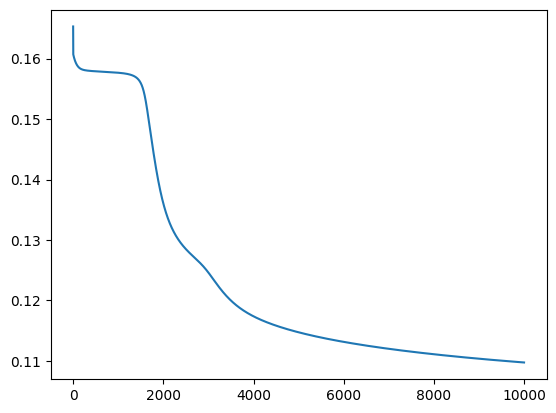

In [130]:
plt.plot(range(GEN),acc)
plt.show()

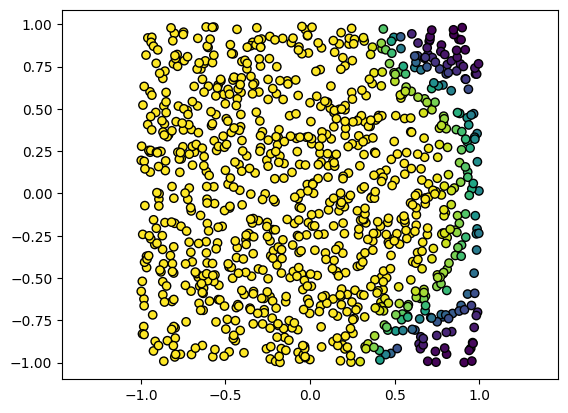

In [131]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=memA[len(W)][:,0],edgecolors='black');

### TASK: contour plot
Make a grid of NGxNG points calculate the predicted value there and plot it

In [139]:
NG = 100
gx, gy = np.meshgrid(np.linspace(-1, 1, NG),np.linspace(-1, 1, NG))
fgx = gx.flatten()
fgy = gy.flatten()
grid = np.array([fgx,fgy]).T
print(np.shape(train_x), np.shape(grid))

(1000, 2) (10000, 2)


In [140]:
C = feed_forward(grid, W, sigmoid).reshape(NG,NG)
np.shape(C)

(100, 100)

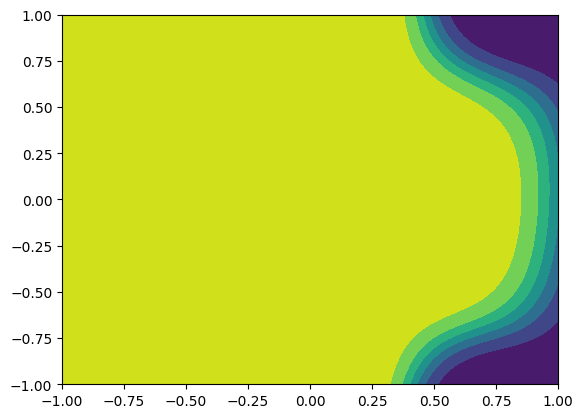

In [134]:
plt.contourf(gx,gy,C)
plt.show()

In [141]:
ML = 7
W = [ np.random.random((2,ML))*2-1, np.random.random((ML,ML))*2-1, np.random.random((ML,1))*2-1 ]
memA = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,ML)), np.zeros((N,1))]
memZ = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,ML)), np.zeros((N,1))]

In [143]:
GEN = 10000
acc = np.zeros(GEN)
for i in range(GEN):
    feed_forward_with_mem(train_x, W, sigmoid, memA, memZ)
    acc[i] = np.square(train_y - memA[len(W)]).mean()
    W = back_propagation(train_y, W, d_sigmoid, memA, memZ, 0.1)

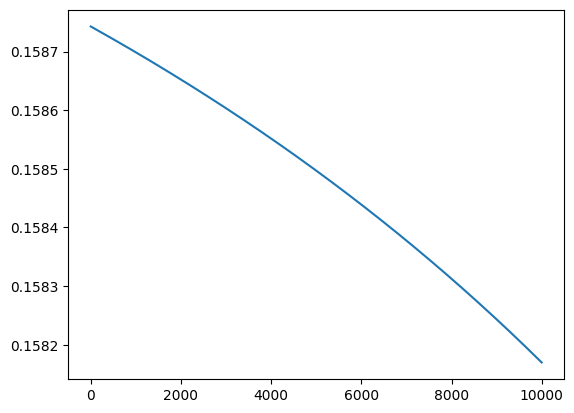

In [144]:
plt.plot(range(GEN),acc)
plt.show()

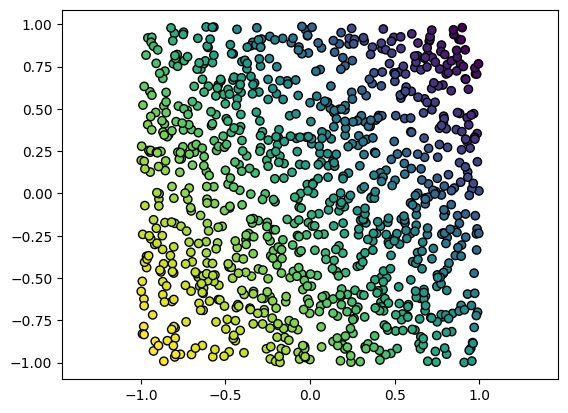

In [145]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=memA[len(W)][:,0],edgecolors='black');

## Task
Implement batch training. Define a batch size `batch` and always choose random `batch` datapoints (with replacement!) and train with only them.
Check if it does improve the results?

Training with batch size = 1
Training with batch size = 10
Training with batch size = 100
Training with batch size = 1000


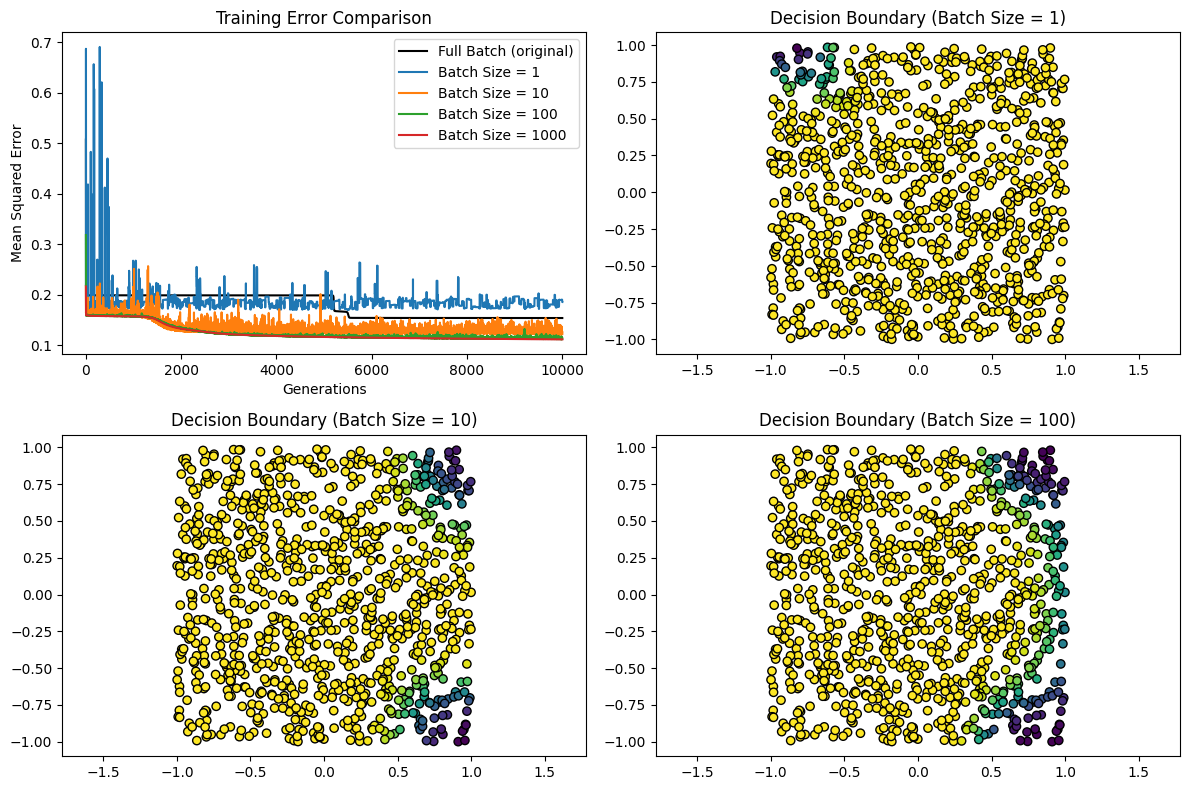

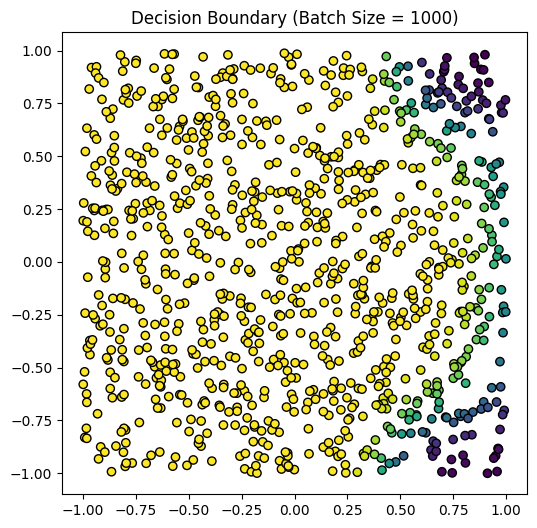

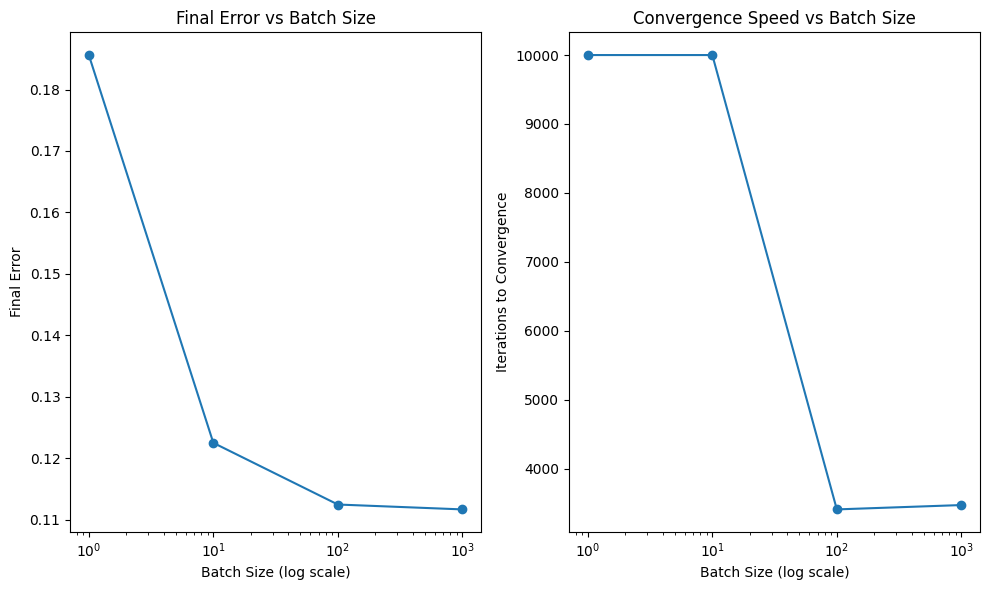

In [156]:
def batch_training(train_x, train_y, batch_size, generations, alpha):
    # Initialize weights for a network with only one hidden layer
    W_batch = [ np.random.random((2,ML))*2-1, np.random.random((ML,1))*2-1 ]
    
    N = train_x.shape[0] 
    # Memory arrays for one hidden layer network
    batch_memA = [np.zeros((batch_size,2)), np.zeros((batch_size,ML)), np.zeros((batch_size,1))]
    batch_memZ = [np.zeros((batch_size,2)), np.zeros((batch_size,ML)), np.zeros((batch_size,1))]
    
    # Track accuracy
    acc_batch = np.zeros(generations)
    
    for i in range(generations):
        # Randomly select batch_size samples with replacement
        if batch_size < N:
            indices = np.random.choice(N, batch_size, replace=True)
            batch_x = train_x[indices]
            batch_y = train_y[indices]
        else:
            # If batch_size equals N, use the full dataset (equivalent to original training)
            batch_x = train_x
            batch_y = train_y
        
        # Forward pass with the batch
        feed_forward_with_mem(batch_x, W_batch, sigmoid, batch_memA, batch_memZ)
        
        # Calculate error on the full dataset for consistent comparison
        full_memA = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
        full_memZ = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
        feed_forward_with_mem(train_x, W_batch, sigmoid, full_memA, full_memZ)
        acc_batch[i] = np.square(train_y - full_memA[len(W_batch)]).mean()
        
        # Backpropagation with the batch
        W_batch = back_propagation(batch_y, W_batch, d_sigmoid, batch_memA, batch_memZ, alpha)
    
    # Return final results using the full dataset for evaluation
    full_memA = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
    full_memZ = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
    feed_forward_with_mem(train_x, W_batch, sigmoid, full_memA, full_memZ)
    
    return acc_batch, W_batch, full_memA


acc_full = acc.copy()

batch_sizes = [1, 10, 100, 1000] 
GEN = 10000
batch_results = []

for bs in batch_sizes:
    print(f"Training with batch size = {bs}")
    acc_mini, W_mini, memA_mini = batch_training(train_x, train_y, bs, GEN, 10)
    batch_results.append((bs, acc_mini, W_mini, memA_mini))

# Plot comparison of all batch sizes
plt.figure(figsize=(12, 8))

# Training error comparison
plt.subplot(2, 2, 1)
plt.plot(range(GEN), acc_full, label='Full Batch (original)', color='black', linestyle='-')
for bs, acc, _, _ in batch_results:
    plt.plot(range(GEN), acc, label=f'Batch Size = {bs}')
plt.legend()
plt.title('Training Error Comparison')
plt.xlabel('Generations')
plt.ylabel('Mean Squared Error')

# Plot decision boundaries - only plot 3 of the 4 batch sizes to avoid subplot index error
for idx, (bs, _, W_mini, memA_mini) in enumerate(batch_results[:3]):  # Only use first 3 results
    plt.subplot(2, 2, idx+2)
    plt.axis('equal')
    plt.scatter(train_x[:,0], train_x[:,1], c=memA_mini[len(W_mini)][:,0], edgecolors='black')
    plt.title(f'Decision Boundary (Batch Size = {bs})')

plt.tight_layout()
plt.show()

# Create a separate figure for the last batch size
plt.figure(figsize=(6, 6))
plt.axis('equal')
bs, _, W_mini, memA_mini = batch_results[3]  # Get the last batch size result
plt.scatter(train_x[:,0], train_x[:,1], c=memA_mini[len(W_mini)][:,0], edgecolors='black')
plt.title(f'Decision Boundary (Batch Size = {bs})')
plt.show()

# Analyze convergence speed
plt.figure(figsize=(10, 6))
final_errors = []
for bs, acc, _, _ in batch_results:
    threshold = 0.12
    try:
        convergence_iter = np.where(acc < threshold)[0][0]
    except IndexError:
        convergence_iter = GEN
    final_errors.append((bs, acc[-1], convergence_iter))
    
bs_values = [b for b, _, _ in final_errors]
error_values = [e for _, e, _ in final_errors]
conv_values = [c for _, _, c in final_errors]

plt.subplot(1, 2, 1)
plt.plot(bs_values, error_values, 'o-')
plt.xscale('log')
plt.xlabel('Batch Size (log scale)')
plt.ylabel('Final Error')
plt.title('Final Error vs Batch Size')

plt.subplot(1, 2, 2)
plt.plot(bs_values, conv_values, 'o-')
plt.xscale('log')
plt.xlabel('Batch Size (log scale)')
plt.ylabel('Iterations to Convergence')
plt.title('Convergence Speed vs Batch Size')

plt.tight_layout()
plt.show()



If we add a bias or a second layer the model would be able to solve this task thi way it can only get one half of the circle right. Also for different batch sizes the learning rate should also be readjusted in order to achieve good results with them

## Homework
Implement the bias in the code and then fit the Breast Cancer Wisconsin Dataset with a network. Try to get better accuracy than with SVM. Plot the sample plots as for the SVM side by side and discuss the similarities and differences.

Generation 0, Train Acc: 0.8867, Val Acc: 0.8947, LR: 0.010000
Generation 100, Train Acc: 0.9863, Val Acc: 0.9649, LR: 0.009900
Generation 200, Train Acc: 0.9941, Val Acc: 0.9561, LR: 0.009802
Generation 300, Train Acc: 0.9941, Val Acc: 0.9561, LR: 0.009704
Early stopping at generation 322

Neural Network Test Accuracy: 0.9825
SVM Test Accuracy: 0.9561

SVM Features Ranked by Importance:
1. mean concave points: 1.4162
2. worst texture: 1.1933
3. radius error: 1.0140
4. worst symmetry: 0.8027
5. area error: 0.7742
6. mean compactness: 0.7540
7. worst concavity: 0.7505
8. mean concavity: 0.6507
9. fractal dimension error: 0.6028
10. worst radius: 0.5982
11. worst area: 0.5506
12. worst fractal dimension: 0.5261
13. symmetry error: 0.3913
14. texture error: 0.3714
15. compactness error: 0.3688
16. mean radius: 0.3551
17. smoothness error: 0.3345
18. mean perimeter: 0.2787
19. concavity error: 0.2438
20. worst smoothness: 0.2302
21. mean area: 0.2247
22. perimeter error: 0.2019
23. concave

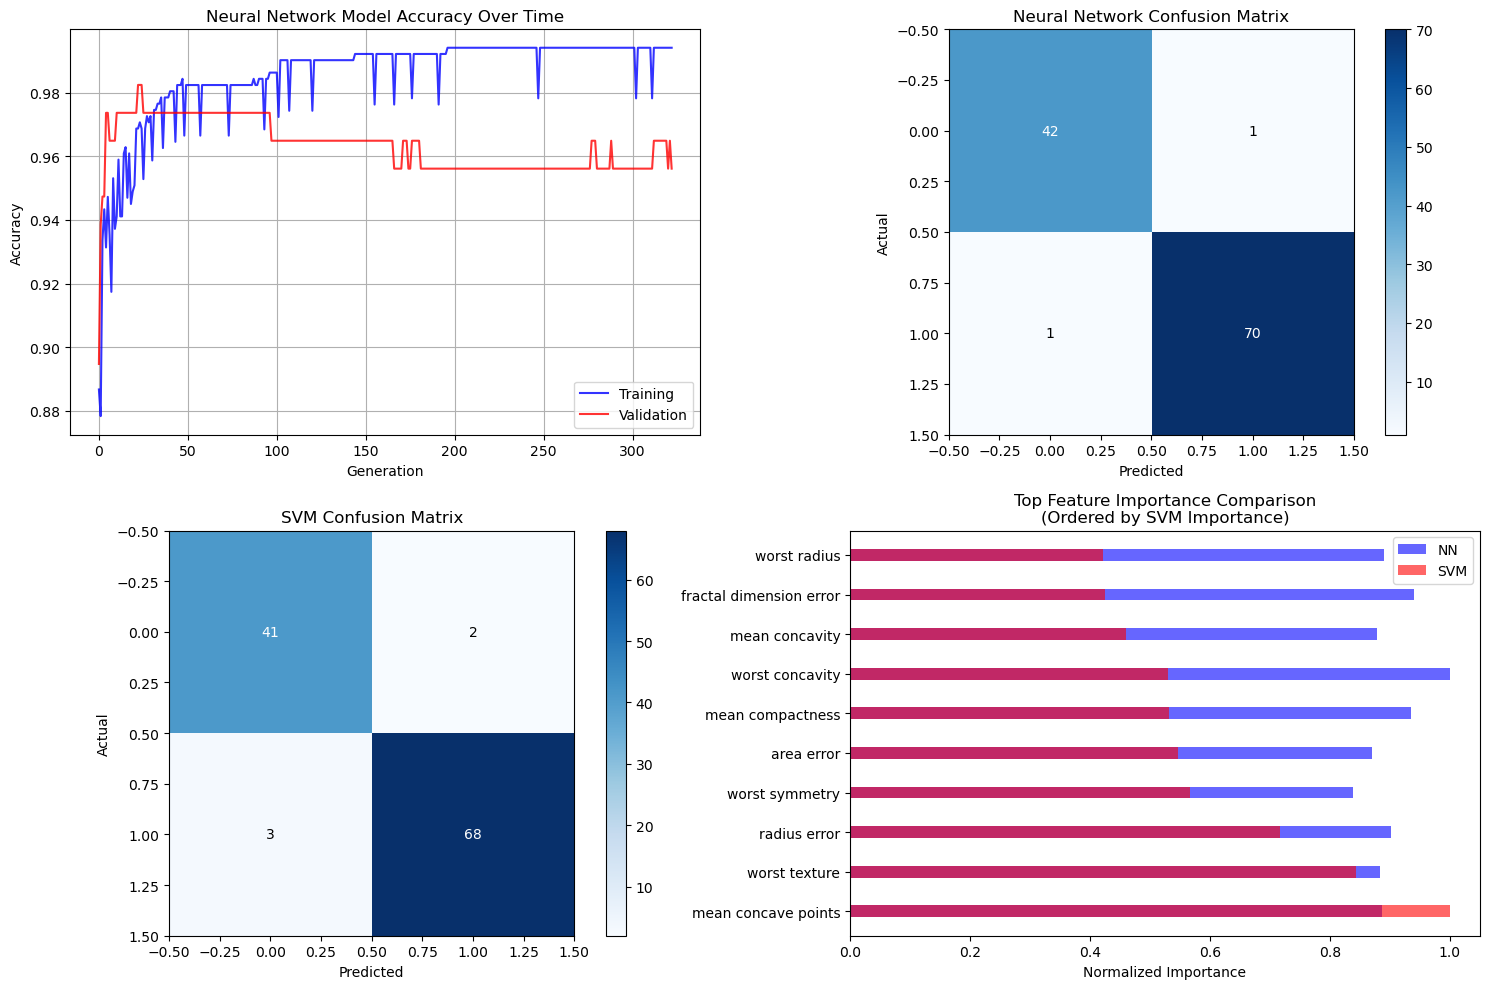

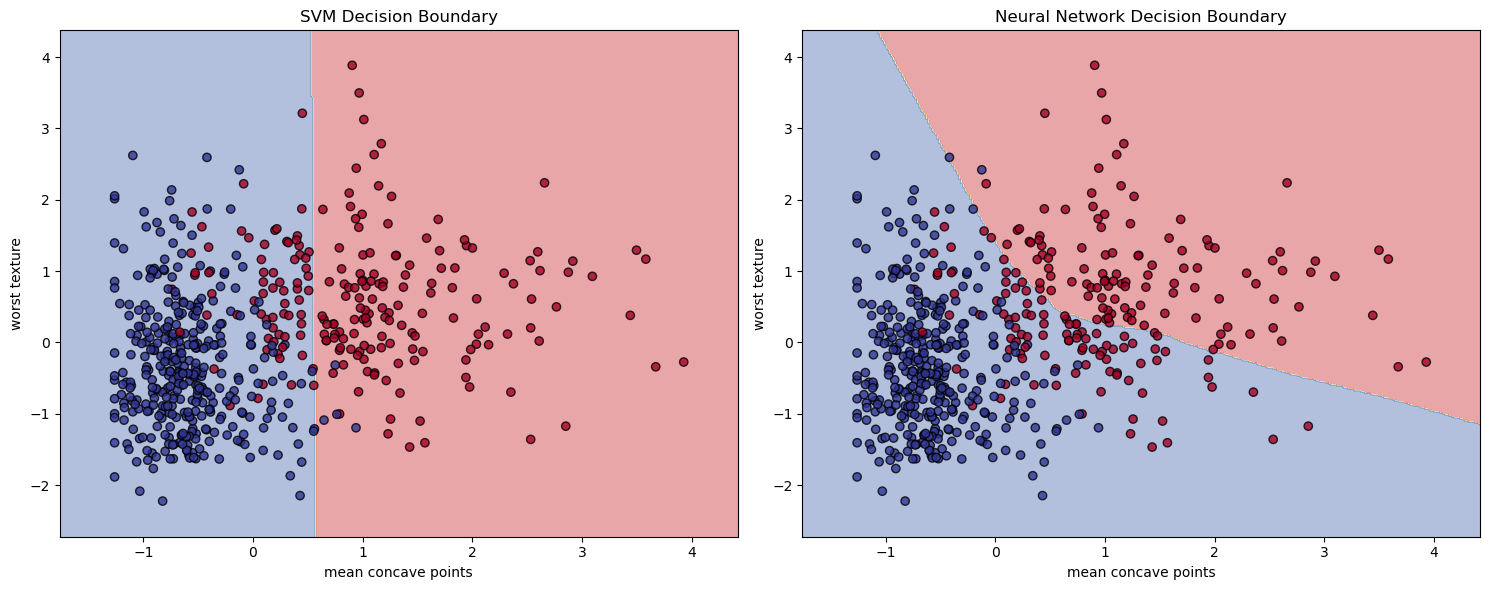

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

#Activation functions from before.
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_derivative(z):
    sig = sigmoid(z)
    return sig * (1.0 - sig)

def feed_forward_with_mem(X, W, b, memA, memZ):
    memA[0] = X
    for l in range(len(W)-1):
        memZ[l+1] = np.dot(memA[l], W[l]) + b[l]
        memA[l+1] = relu(memZ[l+1])
    
    memZ[-1] = np.dot(memA[-2], W[-1]) + b[-1]
    memA[-1] = sigmoid(memZ[-1])
    return memA[-1]

def back_propagation(Y, W, b, memA, memZ, alpha, lambda_reg=0.01):
    m = Y.shape[0]
    L = len(W)
    dA = -(Y / (memA[L] + 1e-10) - (1 - Y) / (1 - memA[L] + 1e-10))
    
    for l in range(L-1, -1, -1):
        if l == L-1:
            dZ = dA * sigmoid_derivative(memZ[l+1])
        else:
            dZ = dA * relu_derivative(memZ[l+1])
        
        dW = (1/m) * np.dot(memA[l].T, dZ)
        db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
        
        dW += (lambda_reg/m) * W[l]
        
        W[l] -= alpha * dW
        b[l] -= alpha * db
        
        if l > 0:
            dA = np.dot(dZ, W[l].T)
    
    return W, b

def plot_confusion_matrix(cm, title, ax):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    plt.colorbar(im, ax=ax)
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")

#Loading and preprocessing data.
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
y_flat = data.target
feature_names = data.feature_names

#Splitting and scaling the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, _, y_train_flat, y_test_flat = train_test_split(X, y_flat, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Constructing the neural network...
input_size = X_train.shape[1]
hidden_sizes = [128, 64, 32]
output_size = 1

#Weight initialization.
np.random.seed(42)
W = []
b = []
layer_sizes = [input_size] + hidden_sizes + [output_size]
for i in range(len(layer_sizes)-1):
    scale = np.sqrt(2.0 / (layer_sizes[i] + layer_sizes[i+1]))
    W.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * scale)
    b.append(np.zeros((1, layer_sizes[i+1])))

#Memory arrays.
N_train = X_train.shape[0]
N_test = X_test.shape[0]
memA_train = [np.zeros((N_train, size)) for size in layer_sizes]
memZ_train = [np.zeros((N_train, size)) for size in layer_sizes]

#Training parameters.
generations = 3000
initial_alpha = 0.01
min_alpha = 0.0001
alpha_decay = 0.9999
batch_size = 64
lambda_reg = 0.0001
patience = 300
min_delta = 0.0001

#Training loop.
train_errors = []
val_errors = []
train_accuracies = []
val_accuracies = []
best_accuracy = 0
patience_counter = 0
best_weights = None
best_biases = None

for i in range(generations):
    alpha = max(initial_alpha * (alpha_decay ** i), min_alpha)
    indices = np.random.permutation(N_train)
    total_batch_error = 0
    total_batch_acc = 0
    num_batches = 0
    
    for batch_start in range(0, N_train, batch_size):
        batch_indices = indices[batch_start:batch_start + batch_size]
        X_batch = X_train_scaled[batch_indices]
        y_batch = y_train[batch_indices]
        
        memA_batch = [np.zeros((len(batch_indices), size)) for size in layer_sizes]
        memZ_batch = [np.zeros((len(batch_indices), size)) for size in layer_sizes]
        
        predictions = feed_forward_with_mem(X_batch, W, b, memA_batch, memZ_batch)
        batch_error = -np.mean(y_batch * np.log(predictions + 1e-10) + 
                             (1 - y_batch) * np.log(1 - predictions + 1e-10))
        batch_acc = np.mean((predictions > 0.5) == y_batch)
        
        total_batch_error += batch_error
        total_batch_acc += batch_acc
        num_batches += 1
        
        W, b = back_propagation(y_batch, W, b, memA_batch, memZ_batch, alpha, lambda_reg)
    
    avg_error = total_batch_error / num_batches
    avg_acc = total_batch_acc / num_batches
    train_errors.append(avg_error)
    train_accuracies.append(avg_acc)
    
    memA_val = [np.zeros((N_test, size)) for size in layer_sizes]
    memZ_val = [np.zeros((N_test, size)) for size in layer_sizes]
    val_predictions = feed_forward_with_mem(X_test_scaled, W, b, memA_val, memZ_val)
    val_error = -np.mean(y_test * np.log(val_predictions + 1e-10) + 
                        (1 - y_test) * np.log(1 - val_predictions + 1e-10))
    val_acc = np.mean((val_predictions > 0.5) == y_test)
    val_errors.append(val_error)
    val_accuracies.append(val_acc)
    
    if val_acc > (best_accuracy + min_delta):
        best_accuracy = val_acc
        best_weights = [w.copy() for w in W]
        best_biases = [b_.copy() for b_ in b]
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f"Early stopping at generation {i}")
        break
    
    if i % 100 == 0:
        print(f"Generation {i}, Train Acc: {avg_acc:.4f}, Val Acc: {val_acc:.4f}, LR: {alpha:.6f}")

#Using the best weights and biases.
W = best_weights
b = best_biases

#Final evaluation.
memA_test = [np.zeros((N_test, size)) for size in layer_sizes]
memZ_test = [np.zeros((N_test, size)) for size in layer_sizes]
nn_final_pred = feed_forward_with_mem(X_test_scaled, W, b, memA_test, memZ_test)
nn_predictions = (nn_final_pred > 0.5).astype(int)
nn_accuracy = np.mean(nn_predictions == y_test)

#SVM.
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1.0))
])
svm.fit(X_train, y_train_flat)
svm_predictions = svm.predict(X_test).reshape(-1, 1)
svm_accuracy = np.mean(svm_predictions == y_test)

print(f"\nNeural Network Test Accuracy: {nn_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

#Feature importance analysis.
svc = svm.named_steps['svc']
svm_importance = np.abs(svc.coef_[0])
nn_importance = np.abs(W[0]).mean(axis=1)

#Creating pairs of feature names and importance values...
svm_pairs = list(zip(feature_names, svm_importance))
nn_pairs = list(zip(feature_names, nn_importance))

#Sorting by importance.
svm_pairs.sort(key=lambda x: x[1], reverse=True)
nn_pairs.sort(key=lambda x: x[1], reverse=True)

#Printing all features ranked by importance.
print("\nSVM Features Ranked by Importance:")
for i, (feature, importance) in enumerate(svm_pairs, 1):
    print(f"{i}. {feature}: {importance:.4f}")

print("\nNeural Network Features Ranked by Importance:")
for i, (feature, importance) in enumerate(nn_pairs, 1):
    print(f"{i}. {feature}: {importance:.4f}")

#Visualization.
plt.style.use('default')
fig = plt.figure(figsize=(15, 10))

#Training progress.
ax1 = fig.add_subplot(221)
ax1.plot(train_accuracies, label='Training', color='blue', alpha=0.8)
ax1.plot(val_accuracies, label='Validation', color='red', alpha=0.8)
ax1.set_title('Neural Network Model Accuracy Over Time')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

#Confusion matrices.
ax2 = fig.add_subplot(222)
cm_nn = confusion_matrix(y_test, nn_predictions)
plot_confusion_matrix(cm_nn, 'Neural Network Confusion Matrix', ax2)

ax3 = fig.add_subplot(223)
cm_svm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm_svm, 'SVM Confusion Matrix', ax3)

#Feature importance visualization.
ax4 = fig.add_subplot(224)
top_n = 10
top_features = [pair[0] for pair in svm_pairs[:top_n]]
svm_values = [pair[1] for pair in svm_pairs[:top_n]]

nn_values = []
for feature in top_features:
    idx = np.where(feature_names == feature)[0][0]
    nn_values.append(nn_importance[idx])

svm_values = np.array(svm_values) / np.max(svm_values)
nn_values = np.array(nn_values) / np.max(nn_values)

pos = np.arange(top_n) + .5

ax4.barh(pos, nn_values, height=0.3, align='center', 
         color='blue', alpha=0.6, label='NN')
ax4.barh(pos, svm_values, height=0.3, align='center', 
         color='red', alpha=0.6, label='SVM')

ax4.set_yticks(pos)
ax4.set_yticklabels(top_features)
ax4.set_xlabel('Normalized Importance')
ax4.set_title('Top Feature Importance Comparison\n(Ordered by SVM Importance)')
ax4.legend()

plt.tight_layout()
plt.show()

#Decision boundary plotting.
plt.figure(figsize=(15, 6))

#Getting the two most important features from the SVM.
top_two_features = [pair[0] for pair in svm_pairs[:2]]
feature_idx = [np.where(feature_names == feature)[0][0] for feature in top_two_features]

#Creating a mesh grid.
X_important = X[:, feature_idx]
X_important_scaled = scaler.fit_transform(X_important)

x_min, x_max = X_important_scaled[:, 0].min() - 0.5, X_important_scaled[:, 0].max() + 0.5
y_min, y_max = X_important_scaled[:, 1].min() - 0.5, X_important_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

#SVM Decision Boundary.
plt.subplot(121)
X_mesh = np.c_[xx.ravel(), yy.ravel()]
X_mesh_full = np.zeros((X_mesh.shape[0], X_train.shape[1]))
X_mesh_full[:, feature_idx] = X_mesh
Z_svm = svm.predict(X_mesh_full)
Z_svm = Z_svm.reshape(xx.shape)

plt.contourf(xx, yy, Z_svm, alpha=0.4, cmap='RdYlBu')
plt.scatter(X_important_scaled[:, 0], X_important_scaled[:, 1], c=y_flat, 
           cmap='RdYlBu', alpha=0.8, edgecolors='black')
plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title('SVM Decision Boundary')

#Neural Network Decision Boundary.
plt.subplot(122)
def nn_predict(X_mesh_full):
    memA = [np.zeros((X_mesh_full.shape[0], size)) for size in layer_sizes]
    memZ = [np.zeros((X_mesh_full.shape[0], size)) for size in layer_sizes]
    predictions = feed_forward_with_mem(X_mesh_full, W, b, memA, memZ)
    return (predictions > 0.5).astype(int)

Z_nn = nn_predict(X_mesh_full)
Z_nn = Z_nn.reshape(xx.shape)

plt.contourf(xx, yy, Z_nn, alpha=0.4, cmap='RdYlBu')
plt.scatter(X_important_scaled[:, 0], X_important_scaled[:, 1], c=y_flat, 
           cmap='RdYlBu', alpha=0.8, edgecolors='black')
plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title('Neural Network Decision Boundary')

plt.tight_layout()
plt.show()

While the neural network achieved a higher accuracy (98.25% vs SVM's 95.61%), the most notable difference is in how the different models use features. The SVM shows a clear hierarchy of feature importance with values ranging widely from 1.4162 to 0.0540, heavily relying on a few key features like mean concave points and worst texture. In contrast, the neural network shows a more uniform distribution of feature importance (0.1006 to 0.0813), suggesting it balances out complex interactions between features rather than depending on individual feature strength. This is particularly evident in how "worst concave points" ranks first in the neural network importance, but 28th in SVM importance. These differences emphasize the neural network's ability to capture non-linear relationships while maintaining more balanced feature utilization, whereas the SVM offers better interpretability through its clear feature hierarchy.

Also, the neural network showed quick convergence, reaching high accuracy by generation 100 and early stopping at generation 322, indicating relatively efficient learning.